In [5]:
import pandas as pd
from typing import List

In [6]:
url = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
df = pd.read_csv(url)

In [7]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df['title'].describe()

count            9742
unique           9737
top       Eros (2004)
freq                2
Name: title, dtype: object

In [9]:
df['genres'].describe()

count      9742
unique      951
top       Drama
freq       1053
Name: genres, dtype: object

Listing all genres and creating columns to One Hot Encoding

## Implementing dummies algorithm

In [58]:
def get_all_dummies(df: pd.DataFrame, column: str) -> List[str]:
    dummies = set()
    for i in range(0, len(df)):
        dummies = dummies.union(set(df[column][i].split('|')))
    dummies = list(dummies)
    
    return dummies

dummies = get_all_dummies(df, column = 'genres')


def create_dummy_columns(df: pd.DataFrame, dummies: List[str]) -> pd.DataFrame: 
    for dummy in all_dummies:
        df[f'{dummy}'] = 0
    return df

df = create_dummy_columns(df, all_dummies)


def set_dummy_data(df, column):
    for i in range(0, len(df)):
        dummies_line = df[column][i].split('|')
        for dummy in dummies_line:
            df[f'{dummy}'][i] = 1
    return df

df = set_dummy_data(df, column='genres')

df.head()

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,movieId,title,genres,Mystery,Horror,Western,Musical,Fantasy,Action,Crime,...,(no genres listed),War,Animation,Drama,Children,Comedy,Adventure,Thriller,Documentary,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Getting dummies with built-in function

In [10]:
dummies = df['genres'].str.get_dummies()
df = pd.concat([df, dummies], axis=1)

In [11]:
df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaled_dummies = scaler.fit_transform(dummies)
scaled_dummies

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

# Using Kmeans

In [15]:
from sklearn.cluster import KMeans

In [16]:
model = KMeans(n_clusters=3)

In [17]:
model.fit(scaled_dummies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
model.labels_

array([0, 0, 1, ..., 2, 0, 1])

In [19]:
print(f'Grupos {model.labels_}')

Grupos [0 0 1 ... 2 0 1]


In [20]:
print(dummies.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [21]:
print(model.cluster_centers_)

[[-0.05917995 -0.00316418  0.88639097  2.26867489  2.43888744  0.20235267
  -0.3150698  -0.20261174 -0.58957937  0.87084999 -0.09492563 -0.26894308
   0.2955682   0.37190889 -0.12304926 -0.25898631  0.1312083  -0.46003122
  -0.1754902  -0.08446034]
 [-0.05917995 -0.23749435 -0.18815242 -0.2574163  -0.27045122  1.21398634
  -0.12112686 -0.15851315 -0.30973841 -0.09838985 -0.09167104 -0.17613306
  -0.11385317  0.09427684 -0.18752163  0.30852082 -0.20210405 -0.41311709
  -0.11368115 -0.04714596]
 [ 0.04554867  0.14145848 -0.04471932 -0.24744081 -0.26973043 -0.7559244
   0.12743562  0.12978019  0.28775426 -0.09523235  0.07112996  0.15193357
   0.01541285 -0.12153164  0.13295667 -0.13735755  0.09676087  0.32623628
   0.09839848  0.04286824]]


In [22]:
groups = pd.DataFrame(model.cluster_centers_, columns=dummies.columns)

In [23]:
groups

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.003164,0.886391,2.268675,2.438887,0.202353,-0.315070,-0.202612,-0.589579,0.870850,-0.094926,-0.268943,0.295568,0.371909,-0.123049,-0.258986,0.131208,-0.460031,-0.175490,-0.084460
1,-0.059180,-0.237494,-0.188152,-0.257416,-0.270451,1.213986,-0.121127,-0.158513,-0.309738,-0.098390,-0.091671,-0.176133,-0.113853,0.094277,-0.187522,0.308521,-0.202104,-0.413117,-0.113681,-0.047146
2,0.045549,0.141458,-0.044719,-0.247441,-0.269730,-0.755924,0.127436,0.129780,0.287754,-0.095232,0.071130,0.151934,0.015413,-0.121532,0.132957,-0.137358,0.096761,0.326236,0.098398,0.042868


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC54144048>,
      dtype=object)

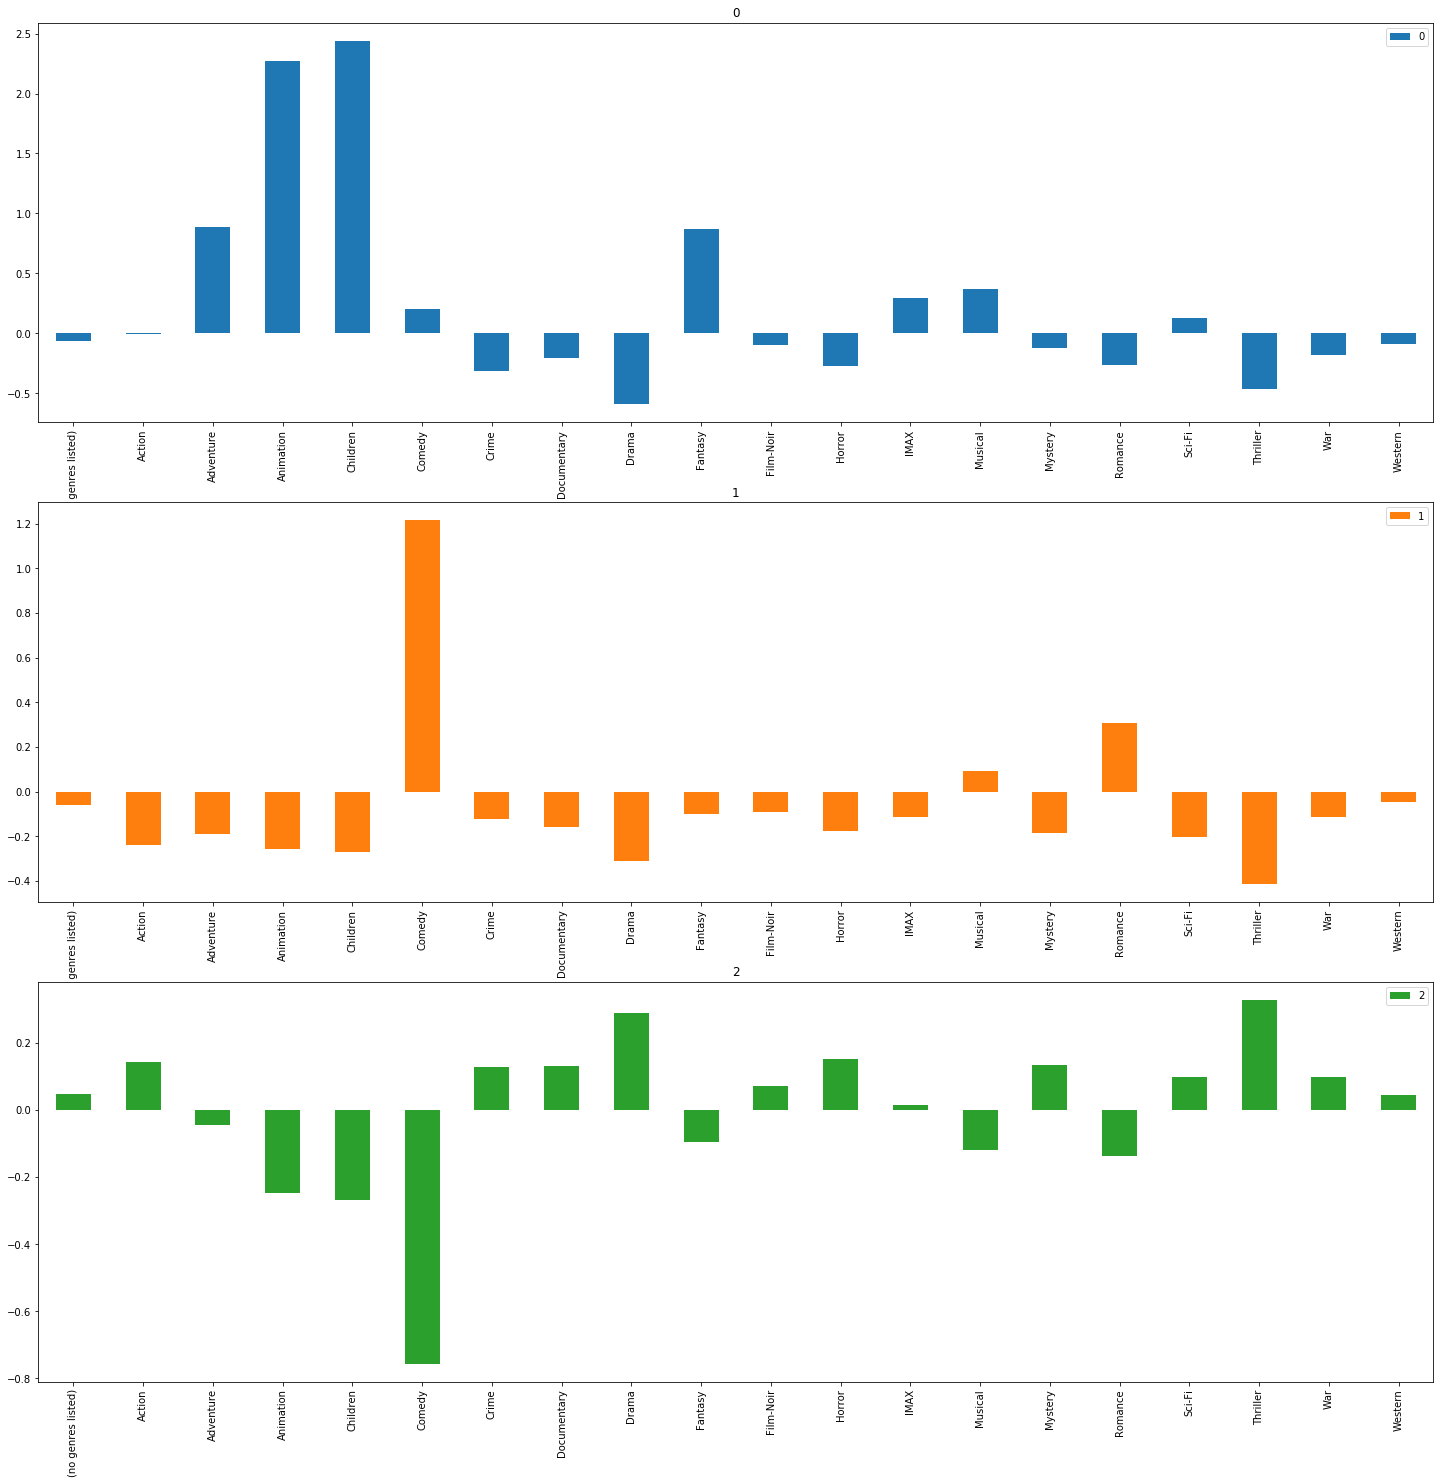

In [25]:
groups.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False)

In [110]:
grupo = 0

filtro = model.labels_ == grupo

df[filtro].head(10)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Sabrina (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,9,Sudden Death (1995),Action,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,11,"American President, The (1995)",Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
13,14,Nixon (1995),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,16,Casino (1995),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,17,Sense and Sensibility (1995),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Dimensionality Reduction using TSNE

In [2]:
from sklearn.manifold import TSNE

In [3]:
tsne = TSNE()

In [28]:
visualization = tsne.fit_transform(scaled_dummies)
visualization

array([[  2.2823923, -58.005844 ],
       [ 42.59528  ,  39.126316 ],
       [ -6.8291836, -37.080967 ],
       ...,
       [-13.207199 ,   1.2452257],
       [-44.872692 ,  40.77758  ],
       [ 22.671986 ,   9.07002  ]], dtype=float32)

In [27]:
import seaborn as sns

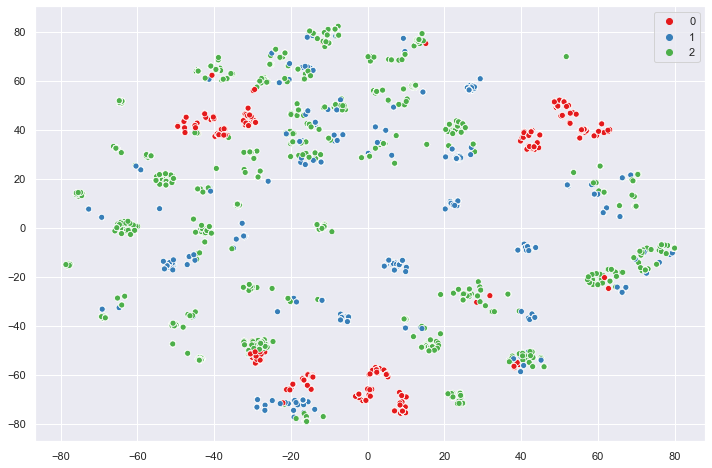

In [41]:
sns.set(rc={
    'figure.figsize': (12,8)
})
sns.scatterplot(x=visualization[:, 0], 
                y=visualization[:, 1], 
                hue=model.labels_, 
                palette=sns.color_palette('Set1', 3))

# Choosing the number of centroids (Elbow Method)

In [46]:
model = KMeans(n_clusters=20)
model.fit(scaled_dummies)
centroids = pd.DataFrame(data= model.cluster_centers_, 
                         columns=dummies.columns)



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC5E98F288>,
      dtype=object)

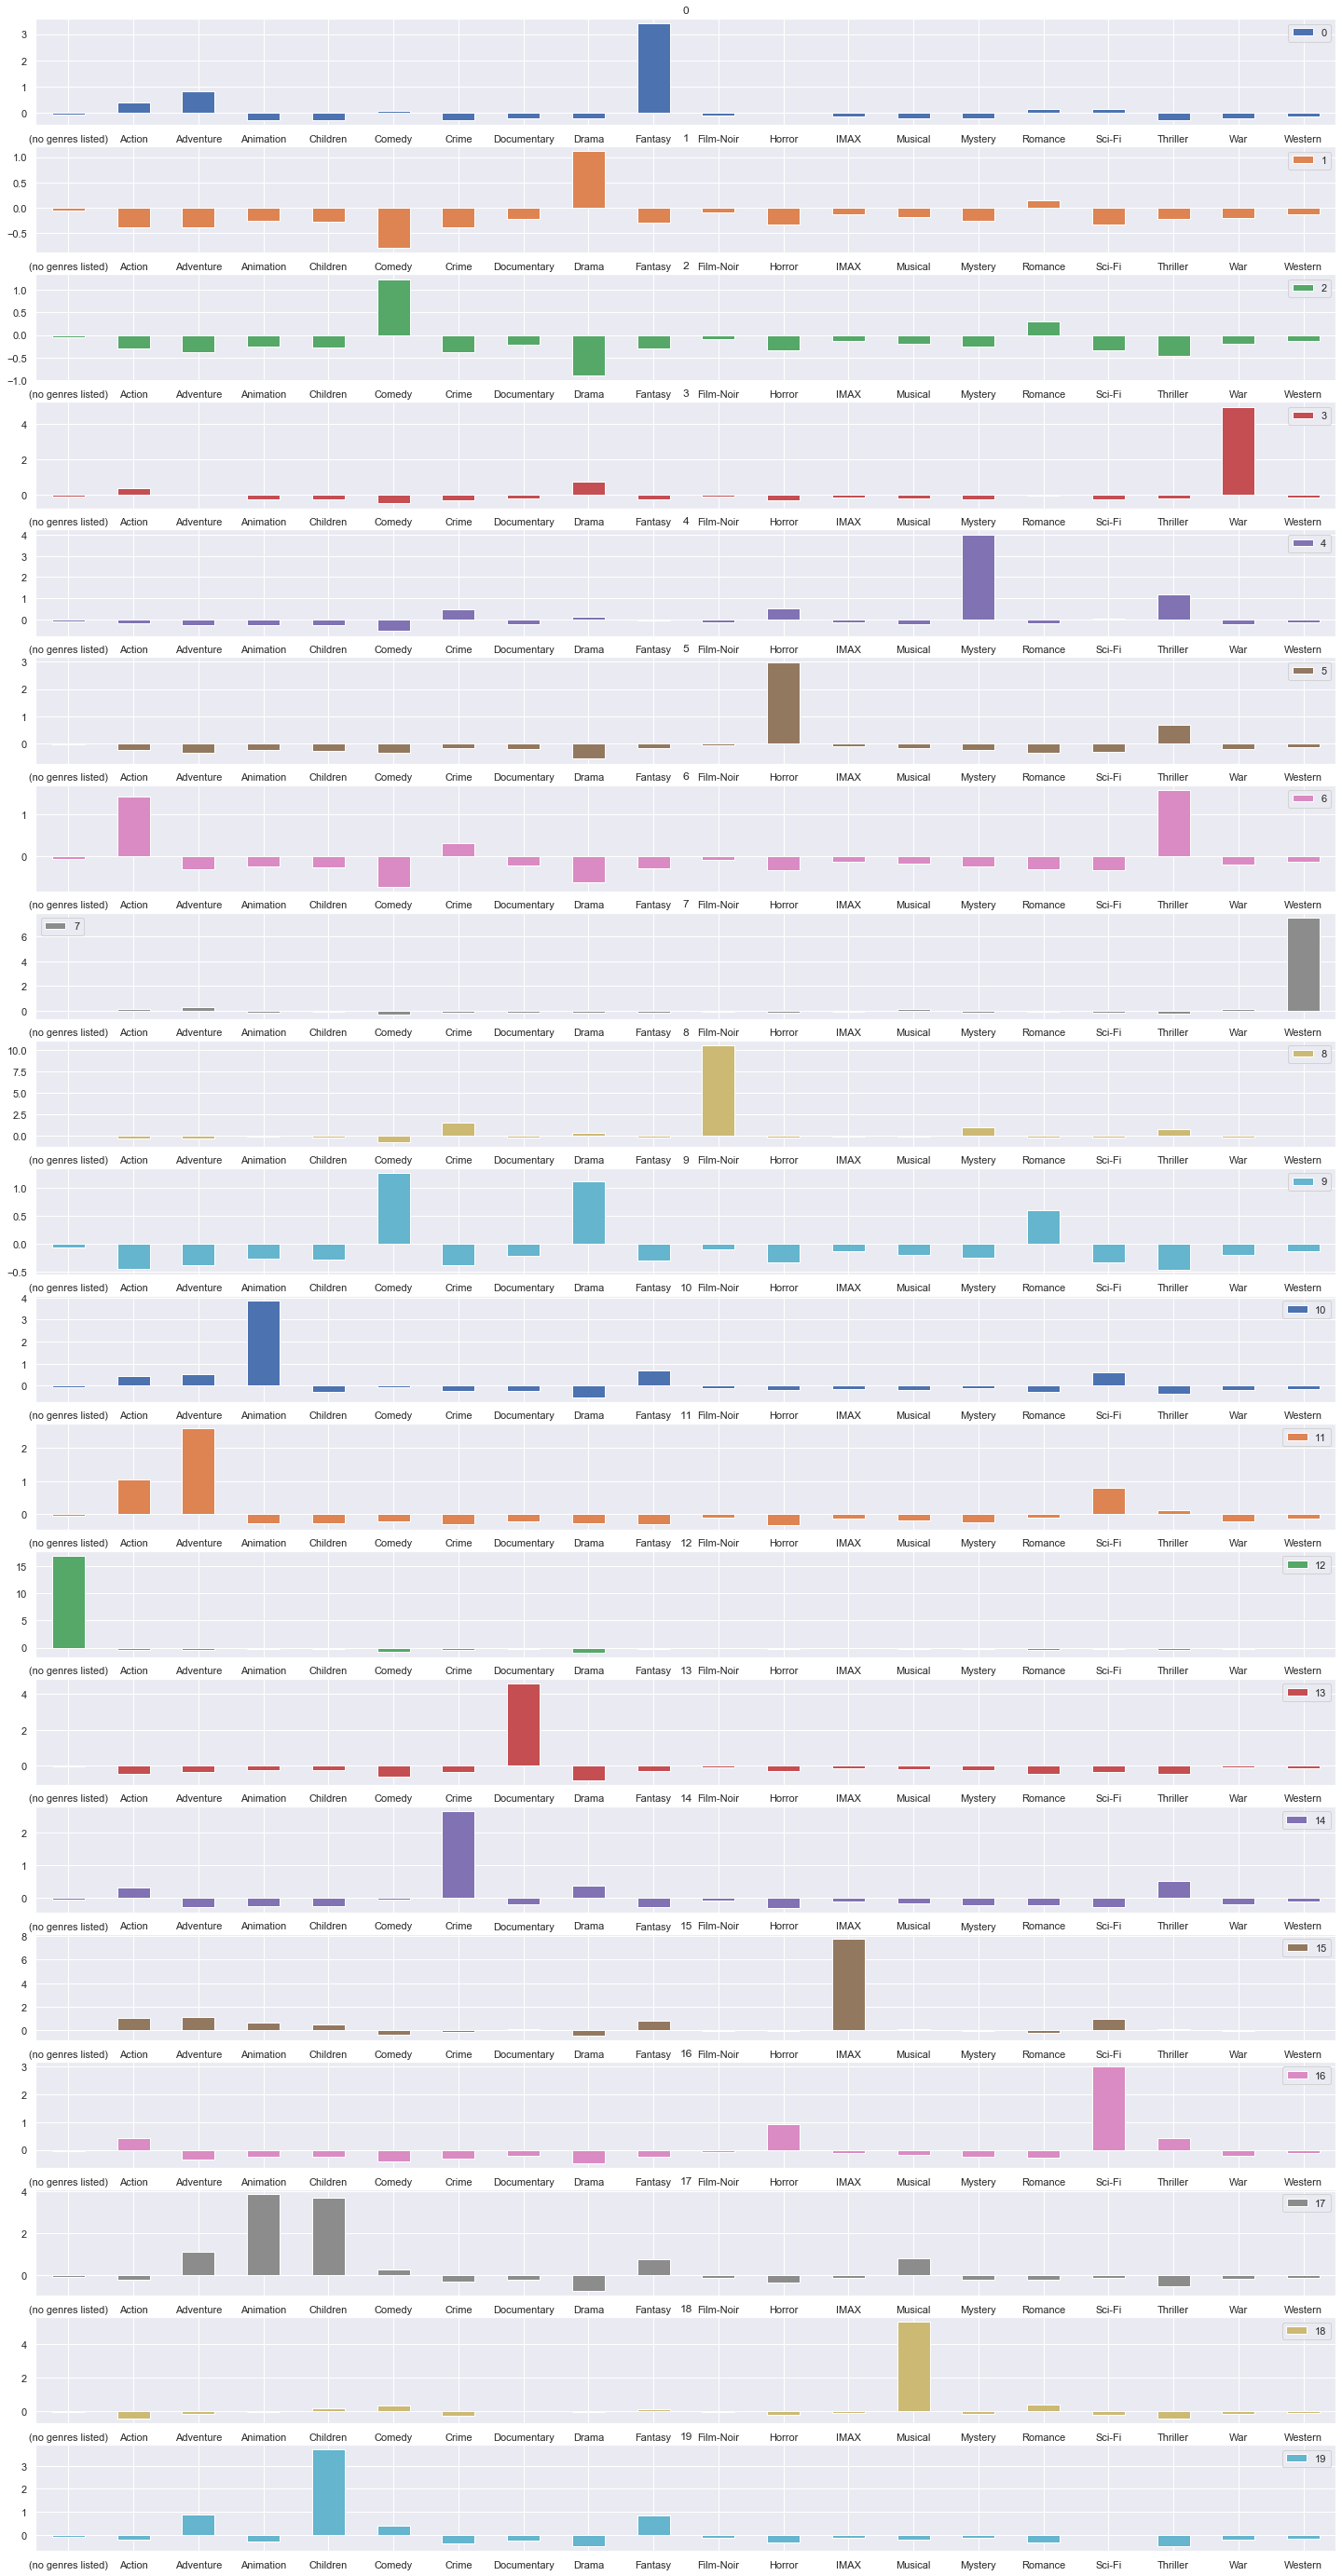

In [54]:
centroids.transpose().plot.bar(subplots=True,
                              figsize=(25,50),
                              sharex=False,
                              rot=0)

Inertia is the KMeans's that returns de MSE of centroid and points

In [78]:
number_centroids = []
mse = []

for i in range(1, scaled_dummies.shape[1] + 15):
    model = KMeans(n_clusters=i)
    model.fit(scaled_dummies)
    number_centroids.append(i)
    mse.append(model.inertia_)

In [79]:
for centroid, error in zip(number_centroids, mse):
    print(f'Centróids {centroid} - Mean Square Error {error}')

Centróids 1 - Mean Square Error 194840.0
Centróids 2 - Mean Square Error 179909.54996425138
Centróids 3 - Mean Square Error 166449.84133948156
Centróids 4 - Mean Square Error 157944.66366449572
Centróids 5 - Mean Square Error 148150.0743210718
Centróids 6 - Mean Square Error 137624.46414752537
Centróids 7 - Mean Square Error 128775.05179145337
Centróids 8 - Mean Square Error 120196.05380465831
Centróids 9 - Mean Square Error 110709.09215285737
Centróids 10 - Mean Square Error 101374.39607895256
Centróids 11 - Mean Square Error 92583.11041158135
Centróids 12 - Mean Square Error 85334.89023521105
Centróids 13 - Mean Square Error 78684.75231411937
Centróids 14 - Mean Square Error 73363.29902617805
Centróids 15 - Mean Square Error 68819.42745977831
Centróids 16 - Mean Square Error 63157.96718396717
Centróids 17 - Mean Square Error 61254.450887331186
Centróids 18 - Mean Square Error 59151.57151792091
Centróids 19 - Mean Square Error 57614.16577643144
Centróids 20 - Mean Square Error 55923.5

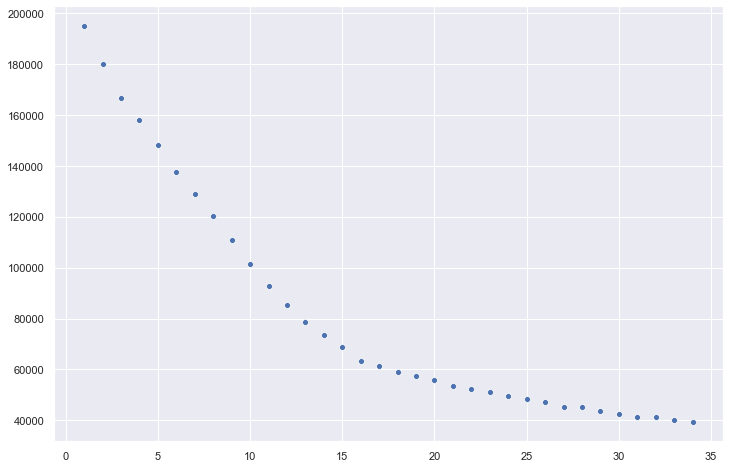

In [80]:
sns.scatterplot(x=number_centroids, y=mse)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC64020608>,
      dtype=object)

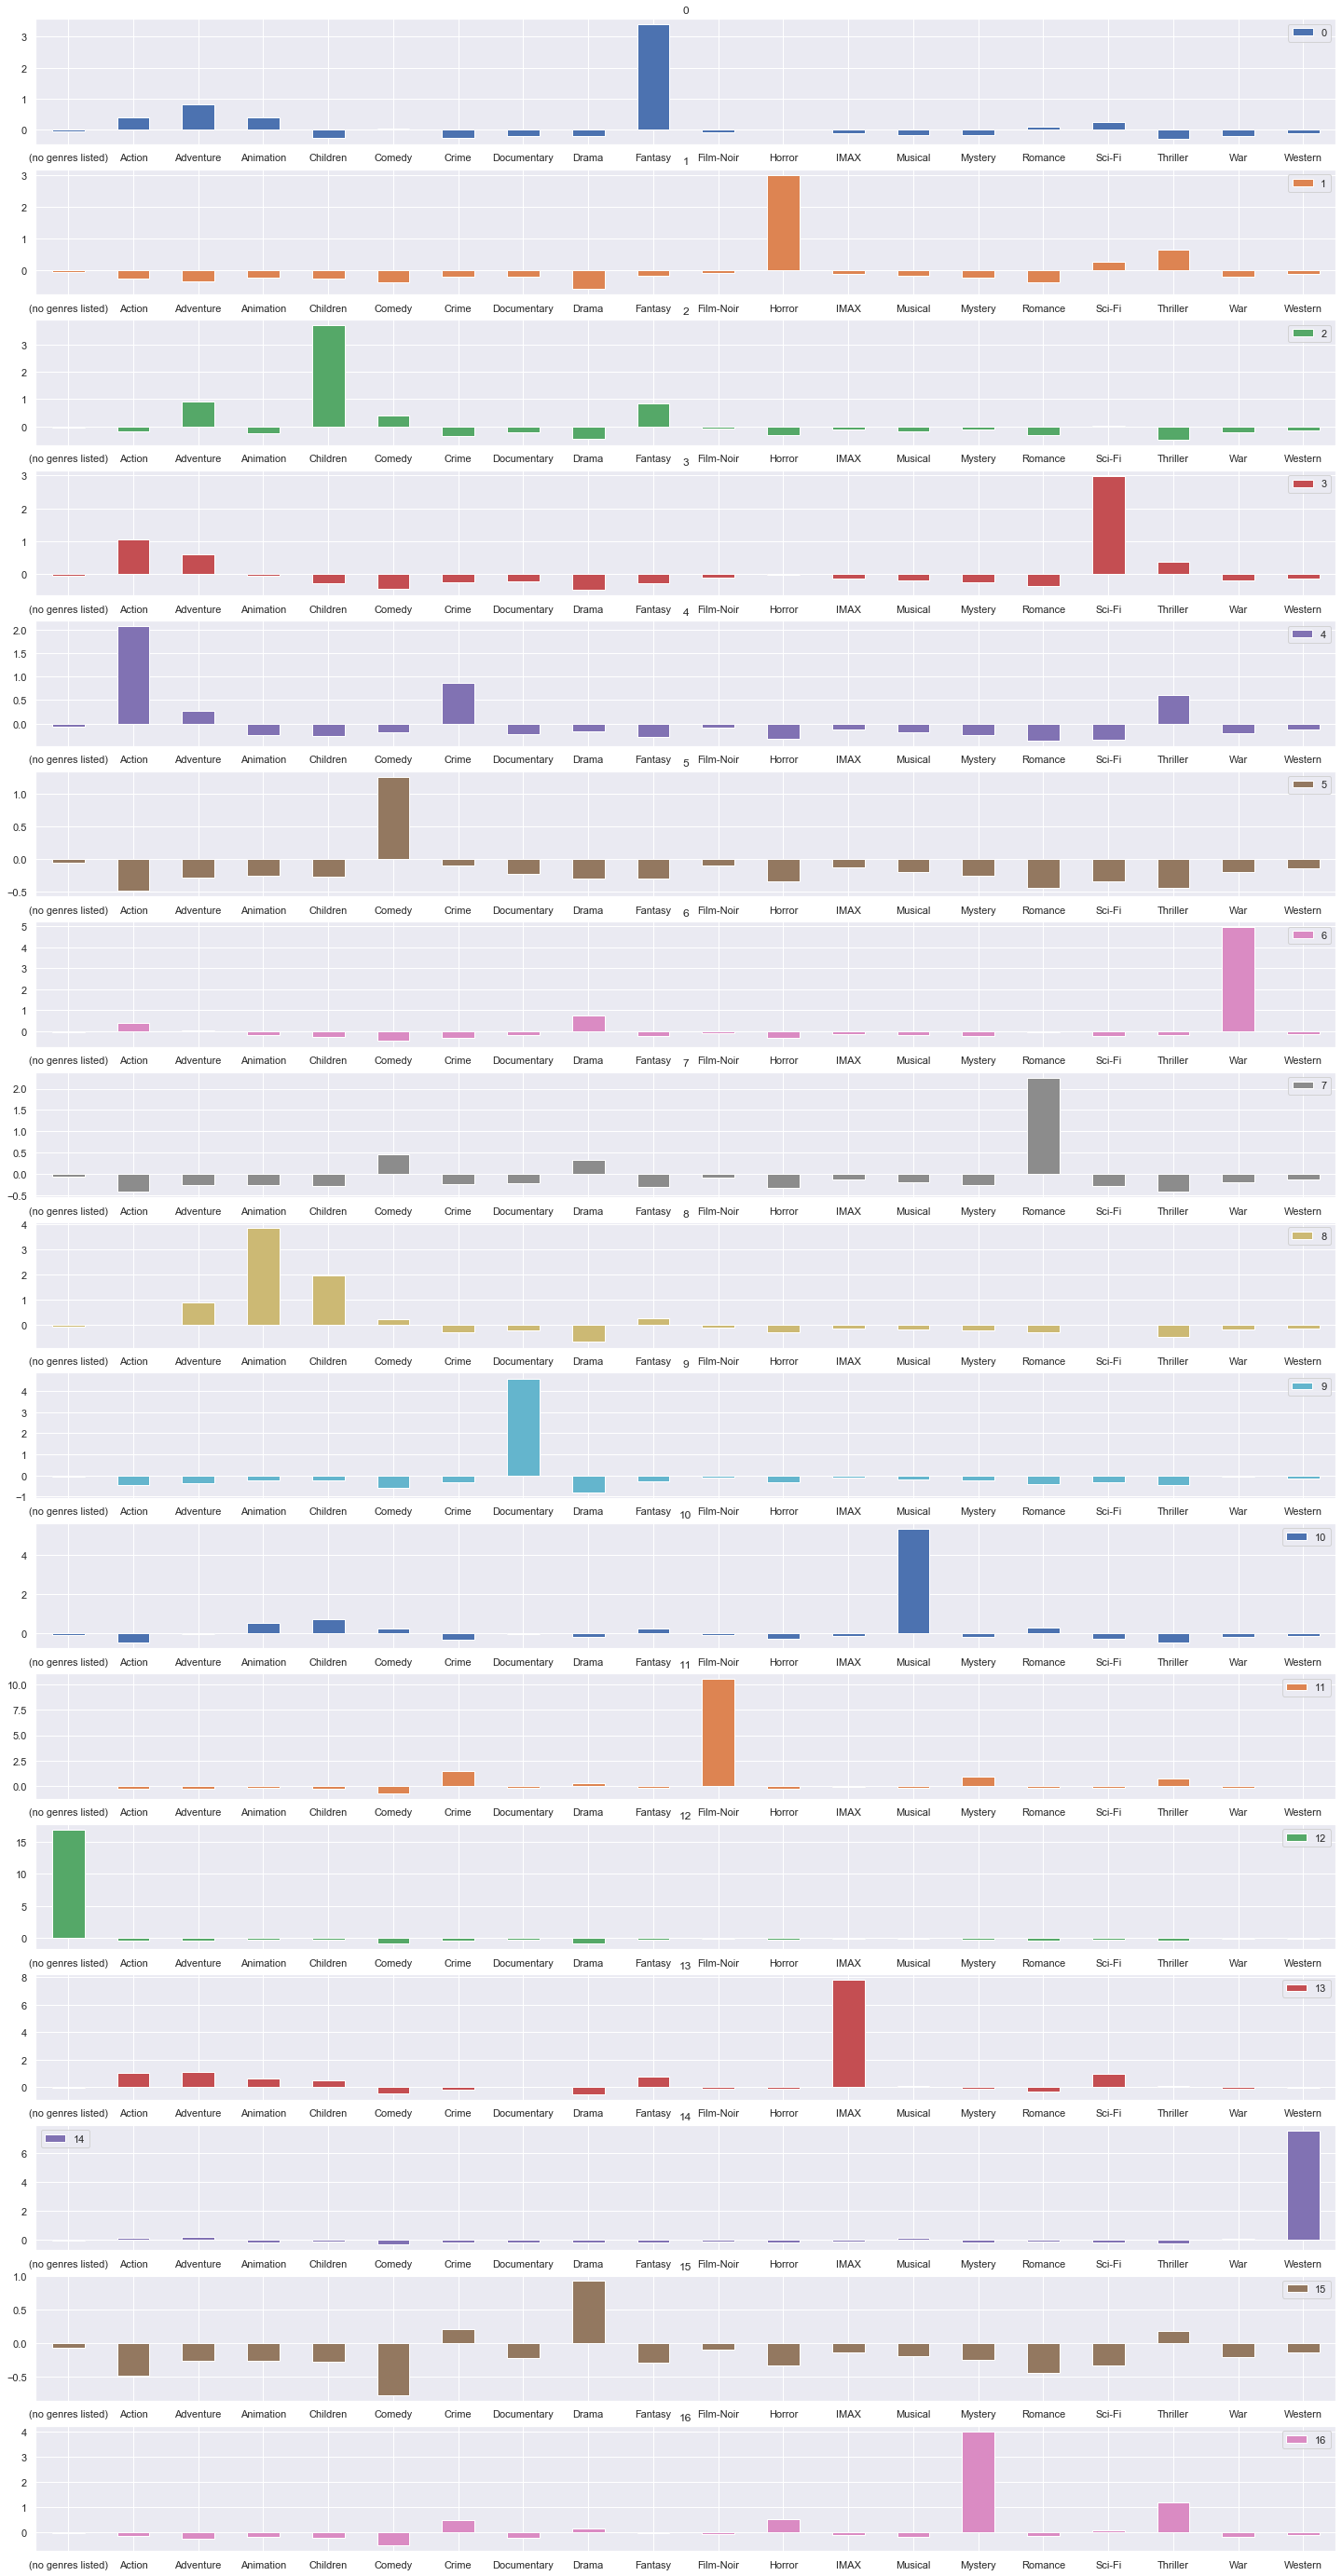

In [81]:
model = KMeans(n_clusters=17)
model.fit(scaled_dummies)
centroids = pd.DataFrame(data= model.cluster_centers_, 
                         columns=dummies.columns)

centroids.transpose().plot.bar(subplots=True,
                              figsize=(25,50),
                              sharex=False,
                              rot=0)

# Hierachical Clustering

In [83]:
from sklearn.cluster import AgglomerativeClustering

In [85]:
model = AgglomerativeClustering(n_clusters=17)

In [87]:
groups = model.fit_predict(scaled_dummies)

In [88]:
groups

array([ 5, 14, 13, ...,  2,  5,  3], dtype=int64)

In [89]:
from sklearn.manifold import TSNE

In [91]:
tsne = TSNE()
visualization = tsne.fit_transform(scaled_dummies)

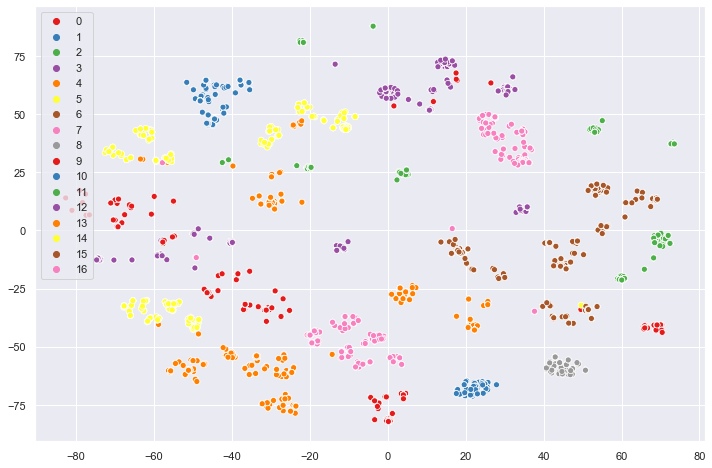

In [101]:
sns.scatterplot(x=visualization[:, 0], 
                y=visualization[:, 1], 
                hue=model.labels_, 
                palette=sns.color_palette('Set1', 17))

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC001A5448>,
      dtype=object)

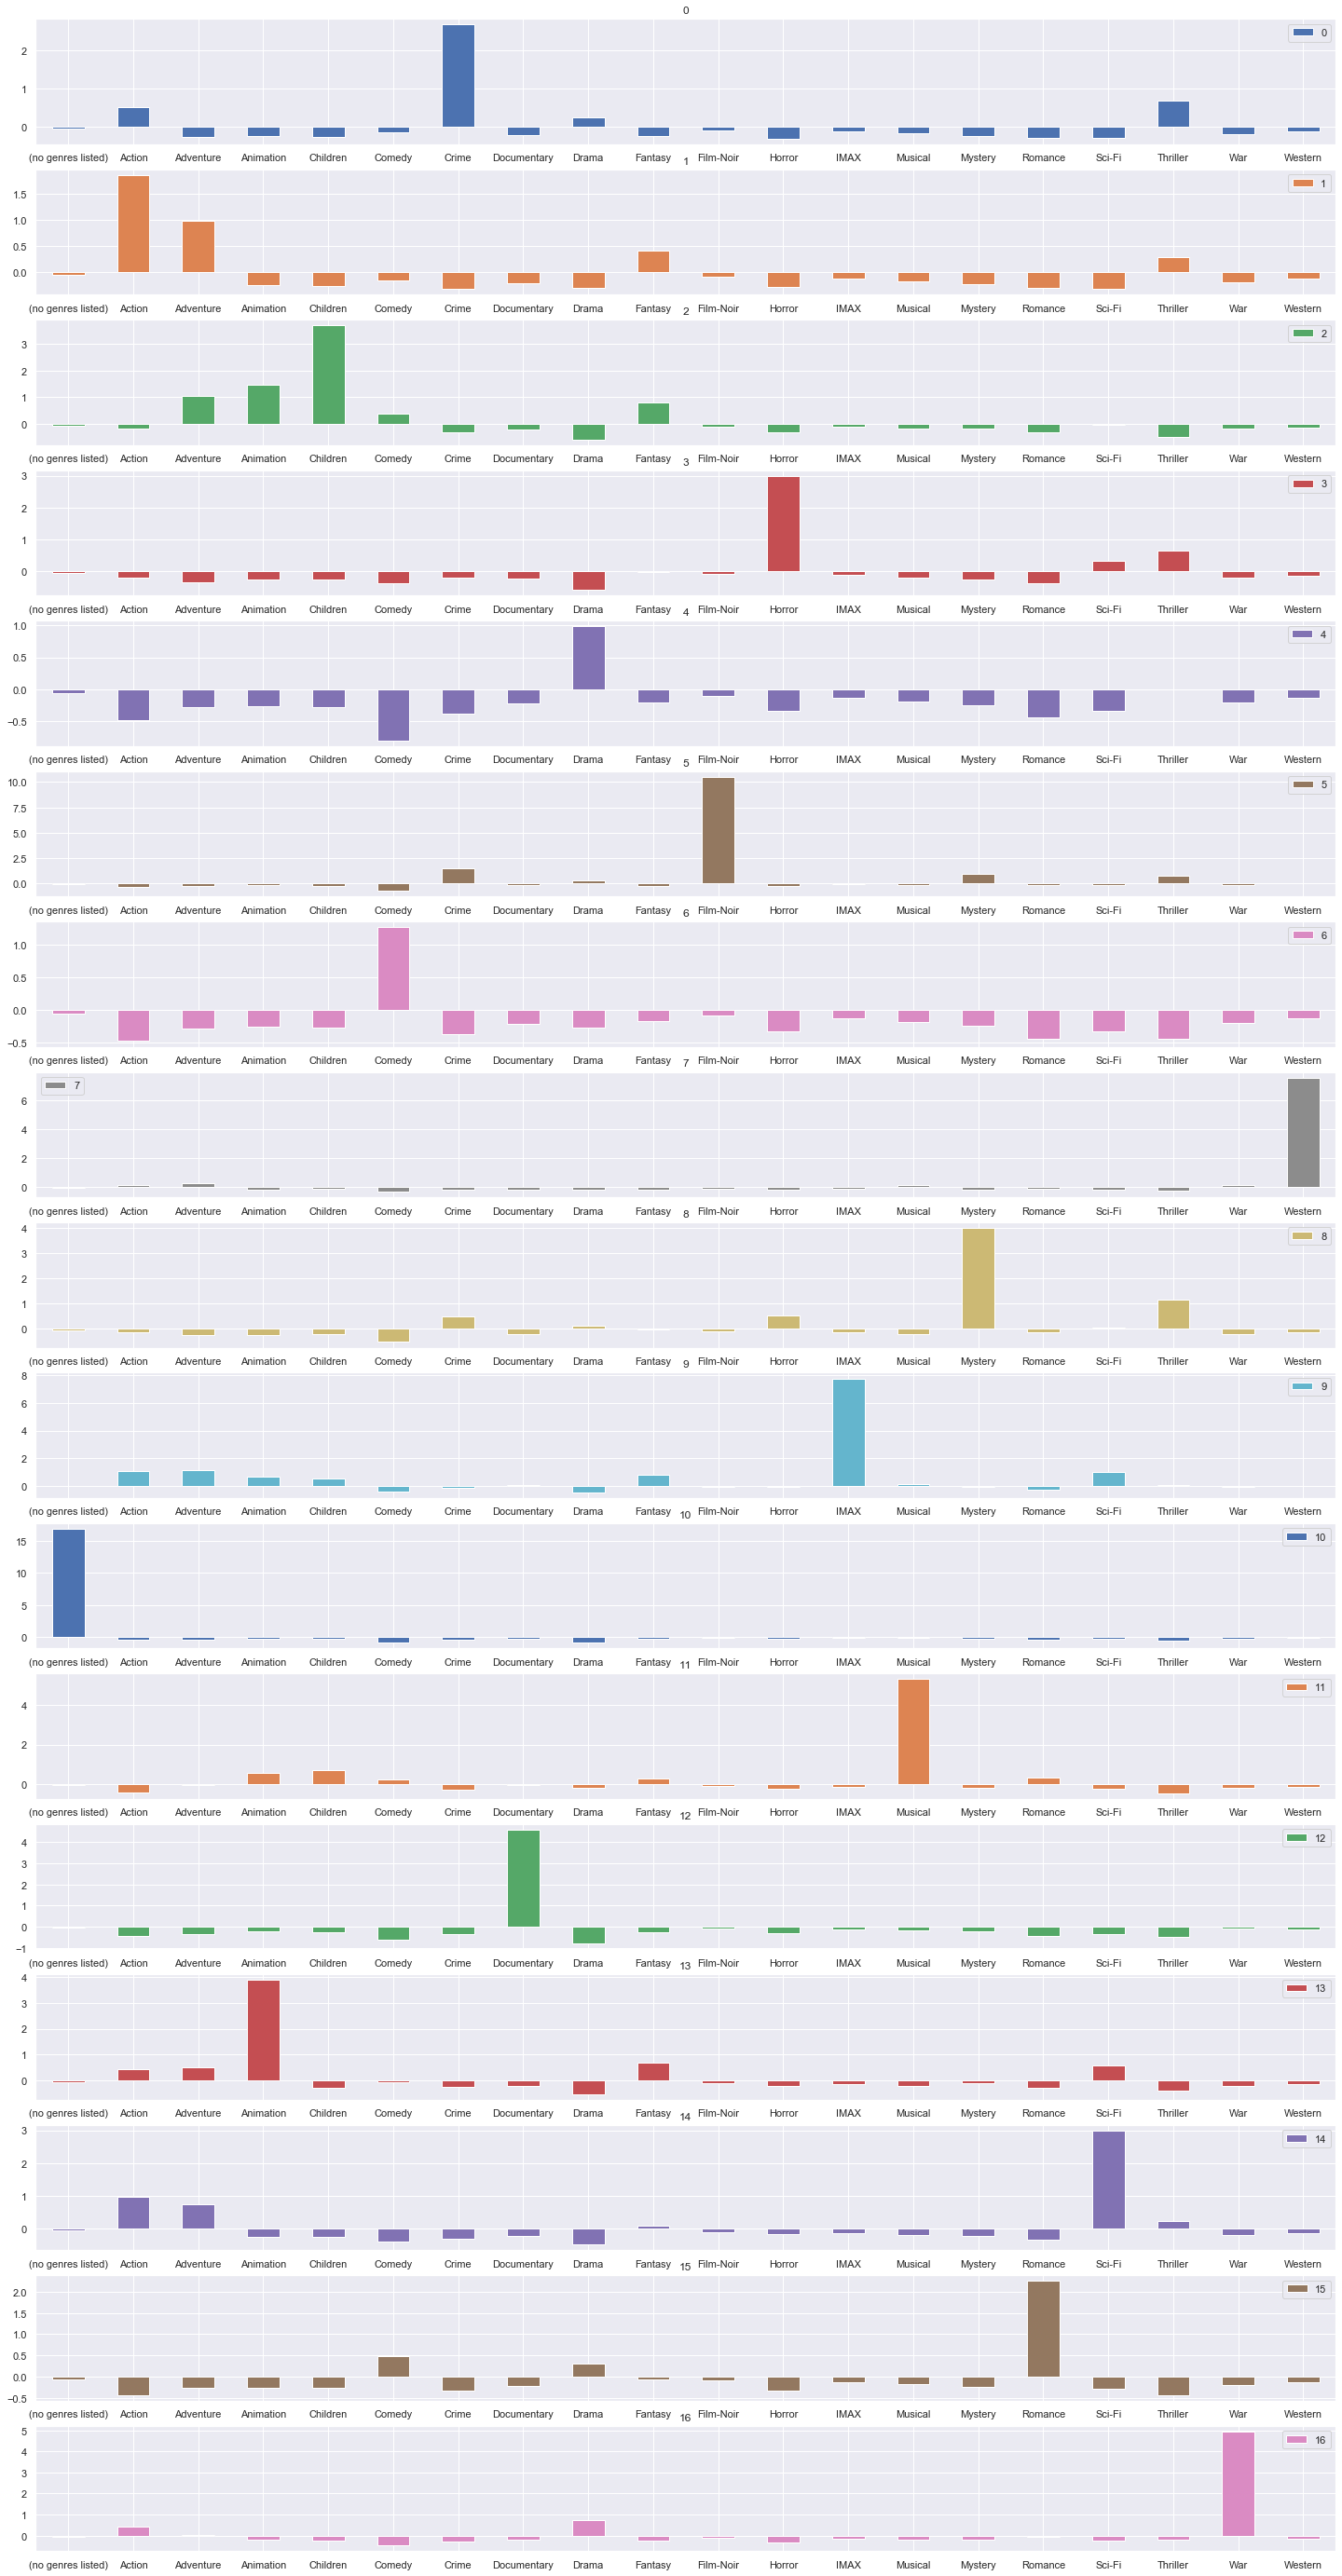

In [104]:
model = KMeans(n_clusters=17)
model.fit(scaled_dummies)
centroids = pd.DataFrame(data= model.cluster_centers_, 
                         columns=dummies.columns)

centroids.transpose().plot.bar(subplots=True,
                              figsize=(25,50),
                              sharex=False,
                              rot=0)

In [106]:
linkage = linkage(centroids)

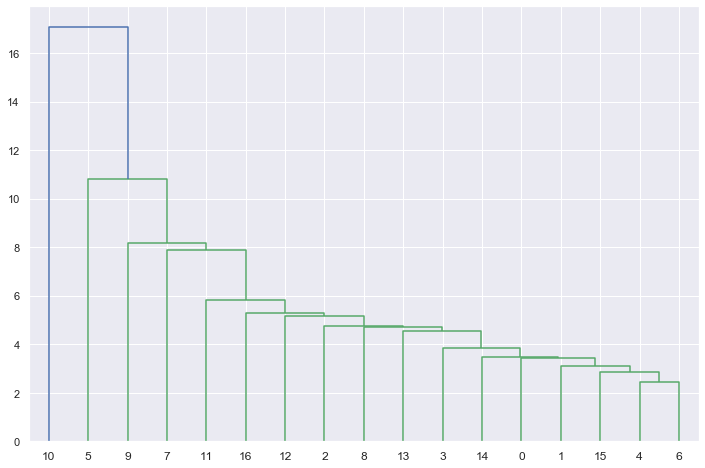

In [108]:
dendrogram = dendrogram(linkage)